In [1]:
import numpy as np
import pandas as pd
import os
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from rake_nltk import Rake

In [2]:
pw = os.getenv('mysql')
connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/'
engine = create_engine(connection_string)

In [3]:
course_list = pd.read_sql("SELECT * FROM udemy_final.course_list", engine)

In [4]:
course_list

,course_id,title,published_time,num_subscribers,price,avg_rating,avg_recent_rating,num_reviews,num_lectures,num_quizzes,...,content_length,primary_category,primary_subcategory,level,headline,description,url,months_since_created,num_subscribers_monthly,instructor_id
0,4810282,Learn how to Create Beats in Fl Studio,2022-08-02,1843,0.00,4.150000,4.124781,14,7,0,...,106,Music,Music Production,Intermediate,Start your journey of Making Music Live,"Hi,In this Course, I will teach you the way ar...",/course/learn-how-to-create-beats-in-fl-studio/,13.07,141.0,1
1,3809298,Problem solving techniques,2021-08-10,2436,0.00,3.972222,3.888317,136,14,0,...,43,Business,Management,All Levels,A comprehensive guide to systematic thinking f...,This course was developed and created by Dr.Ma...,/course/problem-solving-techniques-n/,24.97,98.0,2
2,3538116,Start Money Making WordPress Blog Today!,2020-10-01,3332,0.00,4.150000,4.326433,51,19,0,...,62,Marketing,Affiliate Marketing,All Levels,Start your Affiliate Marketing Website by foll...,If you are looking for a step by step instruct...,/course/create-a-website-blog-for-affiliate-ma...,35.40,94.0,3
3,4830898,JavaScript - Intermediate & Advanced (2022),2022-08-22,4503,0.00,3.950000,3.960767,28,5,0,...,114,Development,Web Development,Intermediate,Understanding Behind The Scene!...,(WARNING ABOUT COURSE DESCRIPTION). A course ...,/course/sharecodecamp-javascript/,12.40,363.0,4
4,4893702,Git & GitHub Course [2022],2022-09-23,5379,0.00,3.150000,3.268604,56,7,0,...,118,Development,Software Development Tools,All Levels,Master them between 4 hours!,(WARNING ABOUT COURSE DESCRIPTION). A course ...,/course/sharecodecamp-git-github/,11.33,475.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39507,3156366,"The Subtle Art of ""LEED V4 BD+C - Sustainable ...",2020-05-28,319,19.99,4.687500,4.473300,59,92,2,...,265,Business,Management,All Levels,LEED v4 | New Construction | Green Building Ce...,About This ClassThe importance of sustainabili...,/course/leed-v4-building-design-construction/,39.60,8.0,19584
39508,3255678,"Launch a Mastermind - Consultants, Speakers, a...",2020-08-25,58,19.99,4.550000,4.521834,16,13,0,...,59,Business,Entrepreneurship,All Levels,Start a mastermind to create a new book of bus...,How to Start a Mastermind GroupLearn the Maste...,/course/launch-a-mastermind/,36.60,2.0,19585
39509,3276254,Everything About Sales : Strategies & Techniques,2020-07-25,0,19.99,0.000000,0.000000,0,21,0,...,91,Business,Sales,All Levels,Ultimate Sales Lesson : sales strategies & clo...,SALES IS AN ART THAN A SCIENCEAre you want to ...,/course/everything-about-sales-strategies-tech...,37.67,0.0,19586
39510,3408034,Mastering Teamwork,2020-11-08,0,19.99,0.000000,0.000000,0,12,0,...,35,Business,Management,All Levels,Learn How To Truly Leverage The Power Of Teamw...,"Andrew Carnegie once said: ""Teamwork is the ab...",/course/mastering-teamwork/,34.13,0.0,19587


In [5]:
# check distribution of num_subscribers

In [6]:
course_list['num_subscribers'].describe()

count    3.951200e+04
mean     5.577677e+03
std      2.490657e+04
min      0.000000e+00
25%      7.800000e+01
50%      6.070000e+02
75%      3.179000e+03
max      1.837007e+06
Name: num_subscribers, dtype: float64

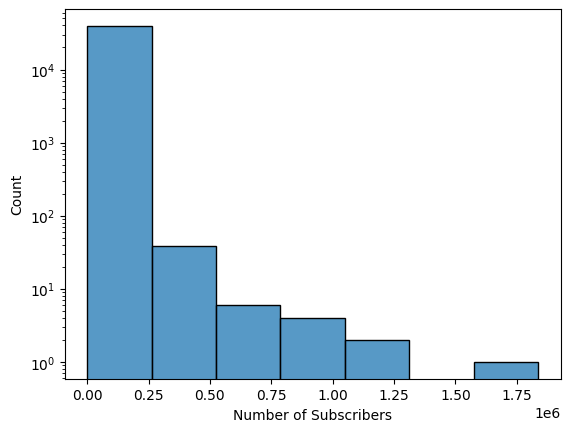

In [107]:
sns.histplot(data=course_list, x='num_subscribers', bins=7)
plt.yscale('log')
plt.xlabel('Number of Subscribers')
plt.show()

In [7]:
# primary_categories with the highest num of subscribers and their average ratings

In [8]:
p_categories = pd.read_sql("select primary_category ,avg(num_subscribers) as average_num_subscribers, avg(avg_rating) as average_rating from udemy_final.course_list group by primary_category order by avg(num_subscribers) desc", engine)
p_categories #sorted by num_subscribers

,primary_category,average_num_subscribers,average_rating
0,Development,13717.0675,4.072279
1,Marketing,11089.6523,4.077526
2,Office Productivity,7974.7089,4.028998
3,Personal Development,7442.1298,4.082675
4,Photography & Video,7183.1821,4.031333
5,IT & Software,6990.1475,3.761338
6,Teaching & Academics,6675.0015,4.161480
7,Design,4950.2320,3.910781
8,Business,4814.5369,3.893101
9,Finance & Accounting,3870.1974,3.760711


In [9]:
p_categories_1 = p_categories.sort_values(by='average_rating', ascending=False)
p_categories_1

,primary_category,average_num_subscribers,average_rating
6,Teaching & Academics,6675.0015,4.161480
3,Personal Development,7442.1298,4.082675
1,Marketing,11089.6523,4.077526
0,Development,13717.0675,4.072279
11,Music,1625.2977,4.043737
4,Photography & Video,7183.1821,4.031333
2,Office Productivity,7974.7089,4.028998
7,Design,4950.2320,3.910781
12,Lifestyle,1537.1093,3.904110
8,Business,4814.5369,3.893101


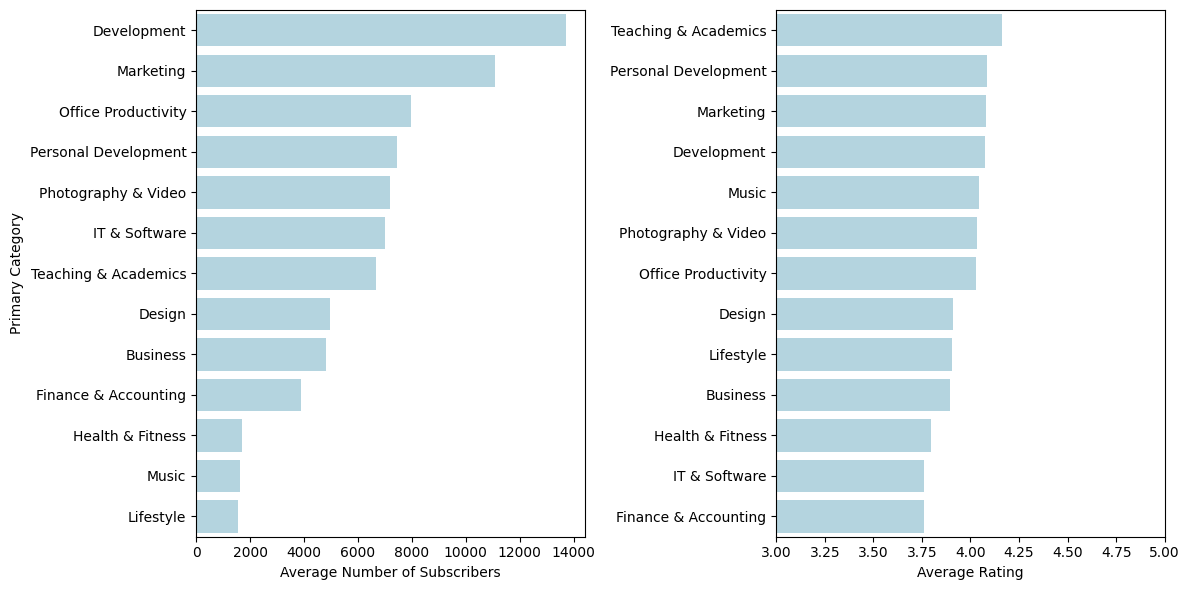

In [10]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.barplot(data=p_categories, x ='average_num_subscribers', y ='primary_category', color='lightblue', ax=ax1)
ax1.set(xlabel='Average Number of Subscribers', ylabel='Primary Category')

sns.barplot(data=p_categories_1, x ='average_rating', y ='primary_category', color='lightblue', ax=ax2)
ax2.set(xlabel='Average Rating', ylabel = None)
ax2.set_xlim(3,5)


plt.tight_layout()
plt.show()

In [ ]:
#IT & Software has a comparatively low rating (less than 4). Could be a way for a course to differentiate itself.No category has rating over 4.5

In [12]:
# primary_subcategories with the highest num of subscribers and their average ratings

In [13]:
p_subcategories = pd.read_sql("select primary_subcategory ,round(avg(num_subscribers)) as average_num_subscribers, avg(avg_rating) as average_rating from udemy_final.course_list group by primary_subcategory order by avg(num_subscribers) desc limit 15", engine)
p_subcategories

,primary_subcategory,average_num_subscribers,average_rating
0,Influence,25257.0,4.358185
1,Search Engine Optimization,22036.0,4.269124
2,Programming Languages,18452.0,3.971552
3,Web Development,16380.0,4.121164
4,Growth Hacking,15822.0,4.040625
5,Memory & Study Skills,13772.0,4.236898
6,Photography,13737.0,3.830566
7,Paid Advertising,13392.0,4.328939
8,Photography Tools,12352.0,4.270380
9,Software Development Tools,11378.0,4.087289


In [14]:
p_subcategories_1 = p_subcategories.sort_values(by='average_rating', ascending=False)
p_subcategories_1

,primary_subcategory,average_num_subscribers,average_rating
0,Influence,25257.0,4.358185
7,Paid Advertising,13392.0,4.328939
8,Photography Tools,12352.0,4.270380
1,Search Engine Optimization,22036.0,4.269124
5,Memory & Study Skills,13772.0,4.236898
11,Software Testing,11247.0,4.184565
12,Google,11161.0,4.134100
3,Web Development,16380.0,4.121164
14,Personal Productivity,10934.0,4.110050
9,Software Development Tools,11378.0,4.087289


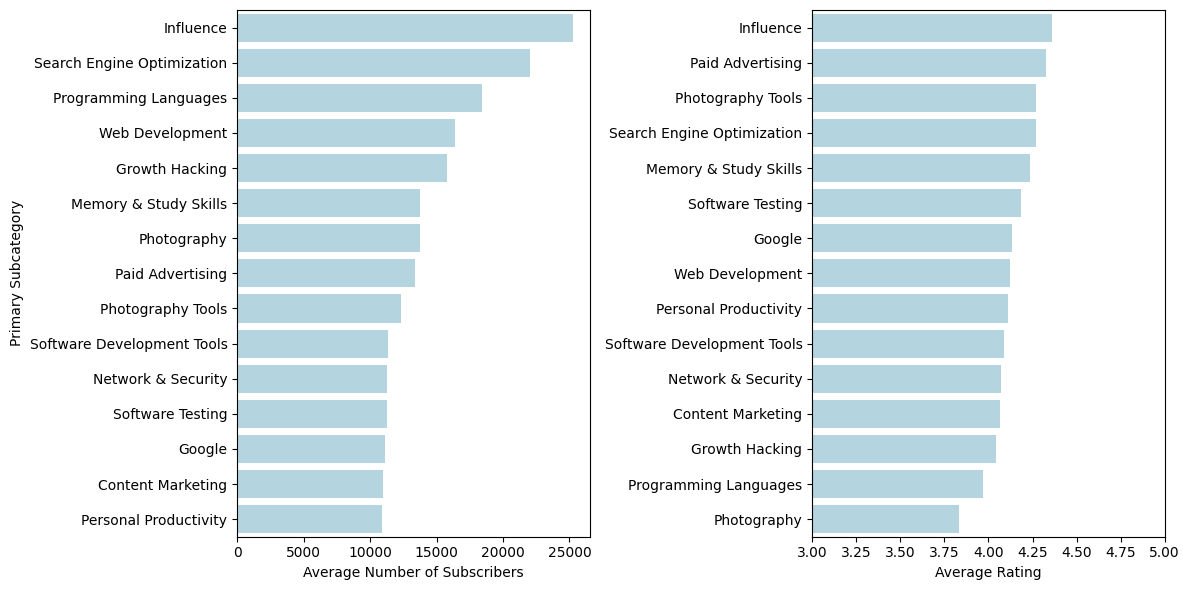

In [15]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.barplot(data=p_subcategories, x ='average_num_subscribers', y ='primary_subcategory', color='lightblue', ax=ax1)
ax1.set(xlabel='Average Number of Subscribers', ylabel='Primary Subcategory')

sns.barplot(data=p_subcategories_1, x ='average_rating', y ='primary_subcategory', color='lightblue', ax=ax2)
ax2.set(xlabel='Average Rating', ylabel = None)
ax2.set_xlim(3,5)


plt.tight_layout()
plt.show()

In [16]:
"""Photography and programming languages have a low score. Could be an opportunity of self_differentiation
   No subcategory has a rating over 4.5"""

'Photography and programming languages have a low score. Could be an opportunity of self_differentiation\n   No subcategory has a rating over 4.5'

In [17]:
# Look for up and coming courses

In [108]:
total_subscribers_rank = pd.read_sql("select course_id, title ,num_subscribers, num_subscribers_monthly, level, avg_rating, price from udemy_final.course_list order by num_subscribers desc limit 15", engine)
total_subscribers_rank

,course_id,title,num_subscribers,num_subscribers_monthly,level,avg_rating,price
0,24823,Java Tutorial for Complete Beginners,1837007,13830.0,All Levels,4.374585,0.00
1,543600,Automate the Boring Stuff with Python Programming,1096977,11356.0,All Levels,4.603459,24.99
2,1565838,The Complete 2023 Web Development Bootcamp,1052384,17858.0,All Levels,4.671704,29.99
3,950390,"Machine Learning A-Z™: AI, Python & R + ChatGP...",973845,11502.0,All Levels,4.522075,24.99
4,433798,Introduction To Python Programming,881203,8522.0,Beginner,4.415594,0.00
5,625204,The Web Developer Bootcamp 2023,877039,9213.0,All Levels,4.683471,24.99
6,851712,The Complete JavaScript Course 2023: From Zero...,819008,9793.0,All Levels,4.698535,24.99
7,1362070,React - The Complete Guide 2023 (incl. React R...,773311,10872.0,All Levels,4.597406,29.99
8,473160,Web Design for Web Developers: Build Beautiful...,678300,6650.0,All Levels,4.469668,0.00
9,247190,C++ Tutorial for Complete Beginners,635654,5880.0,Beginner,4.458228,0.00


In [109]:
# At least three months of age (less ephemeral)
monthly_subscribers_rank = pd.read_sql("select course_id, title ,num_subscribers_monthly, months_since_created, num_subscribers, level, avg_rating, price from udemy_final.course_list where months_since_created >= 3 order by num_subscribers_monthly desc limit 15", engine)
monthly_subscribers_rank

,course_id,title,num_subscribers_monthly,months_since_created,num_subscribers,level,avg_rating,price
0,1565838,The Complete 2023 Web Development Bootcamp,17858.0,58.93,1052384,All Levels,4.671704,29.99
1,5170404,"ChatGPT Complete Guide: Learn Midjourney, Chat...",15213.0,6.03,91736,All Levels,4.540986,19.99
2,24823,Java Tutorial for Complete Beginners,13830.0,132.83,1837007,All Levels,4.374585,0.00
3,2707184,Java Programming: Complete Beginner to Advanced,11831.0,44.87,530843,All Levels,4.513060,19.99
4,950390,"Machine Learning A-Z™: AI, Python & R + ChatGP...",11502.0,84.67,973845,All Levels,4.522075,24.99
5,543600,Automate the Boring Stuff with Python Programming,11356.0,96.60,1096977,All Levels,4.603459,24.99
6,1362070,React - The Complete Guide 2023 (incl. React R...,10872.0,71.13,773311,All Levels,4.597406,29.99
7,3726582,"Complete JAVASCRIPT with HTML5,CSS3 from zero ...",9997.0,32.37,323611,All Levels,4.138614,19.99
8,851712,The Complete JavaScript Course 2023: From Zero...,9793.0,83.63,819008,All Levels,4.698535,24.99
9,625204,The Web Developer Bootcamp 2023,9213.0,95.20,877039,All Levels,4.683471,24.99


In [110]:
ids_potential = set(monthly_subscribers_rank['course_id'])-(set(monthly_subscribers_rank['course_id'])&set(total_subscribers_rank['course_id']))

In [111]:
courses_with_potential = monthly_subscribers_rank[monthly_subscribers_rank['course_id'].isin(ids_potential)]
courses_with_potential

,course_id,title,num_subscribers_monthly,months_since_created,num_subscribers,level,avg_rating,price
1,5170404,"ChatGPT Complete Guide: Learn Midjourney, Chat...",15213.0,6.03,91736,All Levels,4.540986,19.99
7,3726582,"Complete JAVASCRIPT with HTML5,CSS3 from zero ...",9997.0,32.37,323611,All Levels,4.138614,19.99
11,3105814,Python-Introduction to Data Science and Machin...,7450.0,36.37,270968,Beginner,4.160194,19.99
12,3434032,Python Complete Course For Python Beginners,7351.0,36.73,269997,Beginner,4.243182,19.99
13,3033186,JavaScript - Basics to Advanced step by step,7300.0,40.47,295434,Beginner,4.300000,19.99
14,3663284,Python 3 Ultimate Guide,7268.0,33.47,243265,All Levels,4.164473,19.99


In [22]:
courses_with_potential_1 = courses_with_potential.sort_values(by='avg_rating', ascending=False)
courses_with_potential_1

,course_id,title,num_subscribers_monthly,months_since_created,num_subscribers,level,avg_rating,price
1,5170404,"ChatGPT Complete Guide: Learn Midjourney, Chat...",15213.0,6.03,91736,All Levels,4.540986,19.99
13,3033186,JavaScript - Basics to Advanced step by step,7300.0,40.47,295434,Beginner,4.300000,19.99
12,3434032,Python Complete Course For Python Beginners,7351.0,36.73,269997,Beginner,4.243182,19.99
14,3663284,Python 3 Ultimate Guide,7268.0,33.47,243265,All Levels,4.164473,19.99
11,3105814,Python-Introduction to Data Science and Machin...,7450.0,36.37,270968,Beginner,4.160194,19.99
7,3726582,"Complete JAVASCRIPT with HTML5,CSS3 from zero ...",9997.0,32.37,323611,All Levels,4.138614,19.99


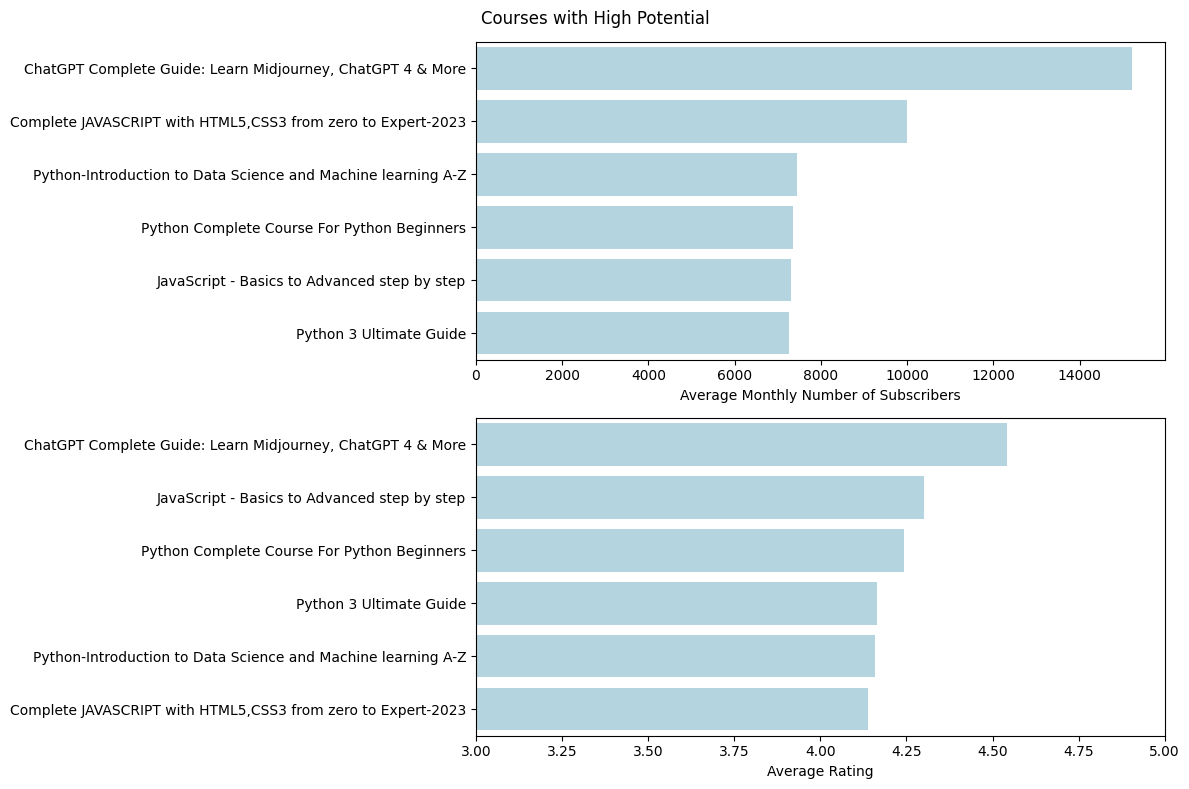

In [23]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.barplot(data=courses_with_potential, x ='num_subscribers_monthly', y ='title', color='lightblue', ax=ax1)
ax1.set(xlabel='Average Monthly Number of Subscribers', ylabel=None)

sns.barplot(data=courses_with_potential_1, x ='avg_rating', y ='title', color='lightblue', ax=ax2)
ax2.set(xlabel='Average Rating', ylabel = None)
ax2.set_xlim(3,5)

plt.suptitle('Courses with High Potential')
plt.tight_layout()
plt.show()

In [ ]:
"""
All popular courses cater to all levels or beginner level. 
None of them are free (low price range) .
"""

In [25]:
# Pricing Strategy (Price Elasticity; Balance price and quality)

In [26]:
paid_or_free = pd.read_sql("select case when price > 0 then 'paid' else 'free' end as pricing, count(1) as num_of_courses from udemy_final.course_list group by pricing", engine)
paid_or_free

,pricing,num_of_courses
0,free,7627
1,paid,31885


In [27]:
# Price distribution
price_dist = pd.DataFrame(course_list['price'].value_counts()).reset_index().sort_values(by='price')
price_dist

,price,count
1,0.00,7627
0,19.99,30017
2,24.99,303
3,29.99,301
7,34.99,108
6,39.99,109
10,44.99,60
4,49.99,184
18,54.99,25
9,59.99,70


In [28]:
# Moderate negative correlation between price and number of courses
price_dist.corr()

,price,count
price,1.000000,-0.323526
count,-0.323526,1.000000


In [29]:
price_num_subscribers = pd.DataFrame(course_list.groupby(by='price')[['num_subscribers']].mean().reset_index()).sort_values(by='price')
price_num_subscribers

,price,num_subscribers
0,0.00,12924.031992
1,19.99,3444.111770
2,24.99,36391.369637
3,29.99,17200.946844
4,34.99,9727.768519
5,39.99,463.623853
6,44.99,652.066667
7,49.99,1341.353261
8,54.99,551.760000
9,59.99,400.671429


In [30]:
# Moderate negative correlation between price and num_subscribers
price_num_subscribers.corr()

,price,num_subscribers
price,1.000000,-0.421849
num_subscribers,-0.421849,1.000000


C:\Users\weili\AppData\Local\Temp\ipykernel_36920\4035856917.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0,10**5)
C:\Users\weili\AppData\Local\Temp\ipykernel_36920\4035856917.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0,10**5)


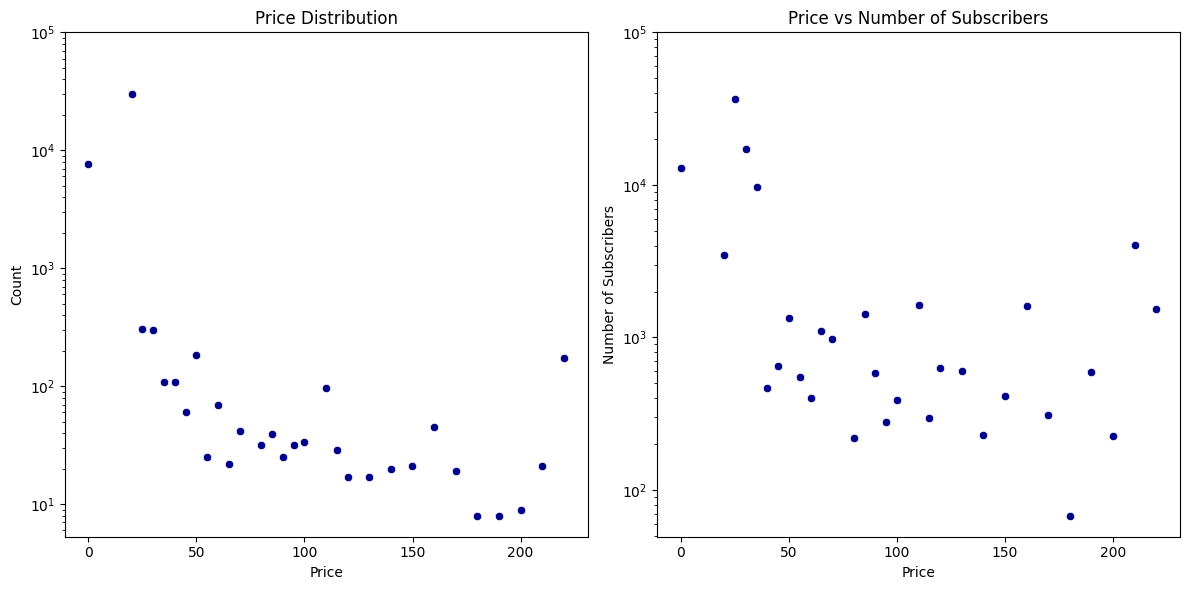

In [31]:
# plot price distribution and price vs num_subscribers

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(data=price_dist, x ='price', y ='count', color='darkblue', ax=ax1)
ax1.set(xlabel='Price', ylabel='Count')
ax1.set_yscale('log')
ax1.set_ylim(0,10**5)
ax1.set_title('Price Distribution')

sns.scatterplot(data=price_num_subscribers, x ='price', y ='num_subscribers', color='darkblue', ax=ax2)
ax2.set(xlabel='Price', ylabel = 'Number of Subscribers')
ax2.set_yscale('log')
ax2.set_ylim(0,10**5)
ax2.set_title('Price vs Number of Subscribers')

plt.tight_layout()
plt.show()

In [32]:
# Top courses (by num_subscribers) and their prices (including free courses)

pd.read_sql("select course_id, title ,num_subscribers, price from udemy_final.course_list order by num_subscribers desc limit 15", engine)

,course_id,title,num_subscribers,price
0,24823,Java Tutorial for Complete Beginners,1837007,0.00
1,543600,Automate the Boring Stuff with Python Programming,1096977,24.99
2,1565838,The Complete 2023 Web Development Bootcamp,1052384,29.99
3,950390,"Machine Learning A-Z™: AI, Python & R + ChatGP...",973845,24.99
4,433798,Introduction To Python Programming,881203,0.00
5,625204,The Web Developer Bootcamp 2023,877039,24.99
6,851712,The Complete JavaScript Course 2023: From Zero...,819008,24.99
7,1362070,React - The Complete Guide 2023 (incl. React R...,773311,29.99
8,473160,Web Design for Web Developers: Build Beautiful...,678300,0.00
9,247190,C++ Tutorial for Complete Beginners,635654,0.00


In [113]:
# Top paid courses (by num_subscribers) and their prices

top_paid_courses = pd.read_sql("select course_id, title ,num_subscribers, price from udemy_final.course_list where price > 0 order by num_subscribers desc limit 20", engine)
top_paid_courses

,course_id,title,num_subscribers,price
0,543600,Automate the Boring Stuff with Python Programming,1096977,24.99
1,1565838,The Complete 2023 Web Development Bootcamp,1052384,29.99
2,950390,"Machine Learning A-Z™: AI, Python & R + ChatGP...",973845,24.99
3,625204,The Web Developer Bootcamp 2023,877039,24.99
4,851712,The Complete JavaScript Course 2023: From Zero...,819008,24.99
5,1362070,React - The Complete Guide 2023 (incl. React R...,773311,29.99
6,2707184,Java Programming: Complete Beginner to Advanced,530843,19.99
7,648826,The Complete Financial Analyst Course 2023,395745,24.99
8,437398,Build Responsive Real-World Websites with HTML...,390266,34.99
9,238934,Pianoforall - Incredible New Way To Learn Pian...,376796,24.99


In [34]:
course_list['price'].describe()

count    39512.000000
mean        18.797103
std         20.202196
min          0.000000
25%         19.990000
50%         19.990000
75%         19.990000
max        219.990000
Name: price, dtype: float64

In [35]:
""" The lowest price of paid courses is 19.99 so the fact that the mean is below the first price
suggests that price tolerance is in general low. This can be seen in the fact
that most of the top paid courses are in the low price range (less than 20). 
It is however still possible to charge a moderate price (such as above 25) and still have a high num of subscribers."""

' The lowest price of paid courses is 19.99 so the fact that the mean is below the first price\nsuggests that price tolerance is in general low. This can be seen in the fact\nthat most of the top paid courses are in the low price range (less than 20). \nIt is however still possible to charge a moderate price (such as above 25) and still have a high num of subscribers.'

### Comparative Analysis

In [36]:
# Reviews and ratings between Group 1 and Group 2

In [37]:
# Creating the two groups

In [38]:
course_list['num_subscribers'].describe()

count    3.951200e+04
mean     5.577677e+03
std      2.490657e+04
min      0.000000e+00
25%      7.800000e+01
50%      6.070000e+02
75%      3.179000e+03
max      1.837007e+06
Name: num_subscribers, dtype: float64

In [39]:
top_courses = course_list.sort_values(['num_subscribers'], ascending=False).head(100)
good_courses = course_list[course_list['num_subscribers'] >= 10000].sort_values(['num_subscribers'], ascending=True).head(100)

In [40]:
top_courses_ids = top_courses['course_id']
good_courses_ids = good_courses['course_id']

In [41]:
# Getting the reviews of the two groups

In [42]:
reviews_both = pd.read_sql('''select r.course_id, cl.title ,cl.num_subscribers, r.rating from udemy_final.reviews r
                            inner join udemy_final.course_list cl
                            on r.course_id = cl.course_id
                            order by num_subscribers desc''', engine)

reviews_both

,course_id,title,num_subscribers,rating
0,24823,Java Tutorial for Complete Beginners,1837007,5.0
1,24823,Java Tutorial for Complete Beginners,1837007,5.0
2,24823,Java Tutorial for Complete Beginners,1837007,3.0
3,24823,Java Tutorial for Complete Beginners,1837007,3.5
4,24823,Java Tutorial for Complete Beginners,1837007,5.0
...,...,...,...,...
109185,2245856,Image Recognition with Neural Networks From Sc...,10000,3.5
109186,2245856,Image Recognition with Neural Networks From Sc...,10000,5.0
109187,2245856,Image Recognition with Neural Networks From Sc...,10000,5.0
109188,2245856,Image Recognition with Neural Networks From Sc...,10000,3.5


In [43]:
reviews_group1 = reviews_both[reviews_both['course_id'].isin(top_courses_ids)]
reviews_group2 = reviews_both[reviews_both['course_id'].isin(good_courses_ids)]

In [116]:
reviews_group1

,course_id,title,num_subscribers,rating
0,24823,Java Tutorial for Complete Beginners,1837007,5.0
1,24823,Java Tutorial for Complete Beginners,1837007,5.0
2,24823,Java Tutorial for Complete Beginners,1837007,3.0
3,24823,Java Tutorial for Complete Beginners,1837007,3.5
4,24823,Java Tutorial for Complete Beginners,1837007,5.0
...,...,...,...,...
99995,3833784,Digital Marketing Strategist. Unlock your care...,182300,5.0
99996,3833784,Digital Marketing Strategist. Unlock your care...,182300,5.0
99997,3833784,Digital Marketing Strategist. Unlock your care...,182300,2.0
99998,3833784,Digital Marketing Strategist. Unlock your care...,182300,5.0


In [44]:
# Ratio of good ratings (> 4) in group 1
len(reviews_group1[reviews_group1['rating'] >= 4])/len(reviews_group1)

0.85245

In [45]:
# Ratio of good ratings (> 4) in group 2
len(reviews_group2[reviews_group2['rating'] >= 4])/len(reviews_group2)

0.8071817192600653

In [46]:
# Important to note that the quantity of reviews differs largely between the two groups.